#### Problem Statement - **Develop a classifier system that takes the title and content of a post From the Pytorch Forum and classify it into the top 12 categories and also recommend the suitable category for a post if it is previously “Uncategorized”**


Simple Transformers - an NLP library based on the Transformers library by HuggingFace. Simple Transformers allows us to fine-tune Transformer models in a few lines of code.

Dataset used : Scraped Pytorch Forum data.

* Install Simple Transformers library
* Select a pre-trained monolingual model
* Load the dataset

**Models Used**

 > BERT

 > RoBERTa

 > distilBERT

 >  XLNet

Steps performed on the 4 models 

* Train/fine-tune the model
* Evaluate the results of the model
* save and load the model
* Test the loaded model on a real example

Performace results of all the 4 models




Resources Used -

https://text-machine-lab.github.io/blog/2020/bert-secrets/ https://mccormickml.com/2019/07/22/BERT-fine-tuning/

https://medium.com/analytics-vidhya/text-classification-with-bert-using-transformers-for-long-text-inputs-f54833994dfd

https://towardsdatascience.com/bert-text-classification-using-pytorch-723dfb8b6b5b


# **Install Simple Transformers library**

In [ ]:
# install simpletransformers
!pip install simpletransformers

# check installed version
!pip freeze | grep simpletransformers
# simpletransformers==0.28.2

     |████████████████████████████████| 221 kB 8.0 MB/s 
     |████████████████████████████████| 264 kB 54.7 MB/s 
     |████████████████████████████████| 8.0 MB 46.2 MB/s 
     |████████████████████████████████| 76 kB 6.4 MB/s 
     |████████████████████████████████| 1.2 MB 49.4 MB/s 
     |████████████████████████████████| 2.6 MB 58.9 MB/s 
     |████████████████████████████████| 1.6 MB 51.3 MB/s 
     |████████████████████████████████| 124 kB 70.4 MB/s 
     |████████████████████████████████| 3.3 MB 43.0 MB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 636 kB 40.1 MB/s 
     |████████████████████████████████| 895 kB 52.8 MB/s 
     |████████████████████████████████| 170 kB 68.3 MB/s 
     |████████████████████████████████| 133 kB 64.9 MB/s 
     |████████████████████████████████| 97 kB 9.3 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 243 kB 64.7 MB/s 
     |█████████████████

simpletransformers==0.61.13


In [ ]:
!pip install tokenizers==0.9.4

     |████████████████████████████████| 2.9 MB 7.5 MB/s 
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.10.3
    Uninstalling tokenizers-0.10.3:
      Successfully uninstalled tokenizers-0.10.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.9.2 requires tokenizers<0.11,>=0.10.1, but you have tokenizers 0.9.4 which is incompatible.


# **Select a pre-trained monolingual model**
As mentioned above the Simple Transformers library is based on the Transformers library from HuggingFace. This enables us to use every pre-trained model provided in the Transformers library and all community-uploaded models. For a list that includes community-uploaded models, refer to https://huggingface.co/models.

We are going to use the distilbert-base-german-cased model. DistilBERT is a small, fast, cheaper version of BERT. It has 40% less parameters than bert-base-uncased and runs 60% faster while preserving over 95% of Bert’s performance.

# **Load the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/AllData.csv')
df.head()

,Unnamed: 0,Topic Title,Category,Tags,Leading Post,Post Replies,Created_at,Likes,Views,Replies
0,0,About the distributed category,distributed,[],(Replace this first paragraph with a brief des...,"['Hi, smth, this is my (maybe almost) first co...","Dec 30, 2018 11:01 pm",0,701,1
1,1,Memory leak when using RPC for pipeline parall...,distributed,['distributed-rpc'],"Hi, when I use torch.distributed.rpc to implem...",['This looks interesting!\nI think firs you ne...,"Jul 20, 2021 5:39 am",0,75,11
2,2,Distributed Data Parallel example - “process 0...,distributed,[],I’m running Distributed Data Parallel example ...,[],0,0,0,0
3,3,How to use 8GPUs as 1,distributed,[],Hi I’m trying to do a learning a certain way a...,[],0,0,0,0
4,4,Disabling all reduce in Distributed Data Parallel,distributed,[],"Hello, I’m trying to setup distributed model t...",['\nIs it possible to disable this functionali...,"Jul 21, 2021 9:09 am",0,25,3


In [ ]:
df.columns

Index(['Unnamed: 0', 'Topic Title', 'Category', 'Tags', 'Leading Post',
       'Post Replies', 'Created_at', 'Likes', 'Views', 'Replies'],
      dtype='object')

In [ ]:
df['Tags'] = df['Tags'].str.replace("[", "")
df['Tags'] = df['Tags'].str.replace("]", "")
df['Tags'] = df['Tags'].str.replace("'", "")
df['Post Replies'] = df['Post Replies'].str.replace("[", "")
df['Post Replies'] = df['Post Replies'].str.replace("]", "")
df['Post Replies'] = df['Post Replies'].str.replace("'", "")
df = df[df.Category != 'glow']
df = df[df.Category != 'Opacus']
df = df[df.Category != 'FAQ']
df = df[df.Category != 'Memory Format']
df = df[df.Category != 'FX (Functional Transformations)']
df = df[df.Category != 'mixed-precision']
df = df[df.Category != 'projects']
df = df[df.Category != 'Captum']
df = df[df.Category != 'complex']
df = df[df.Category != 'tensorboard']
df = df[df.Category != 'Mac OS X']
df = df[df.Category != 'Site Feedback']
df = df[df.Category != 'ignite']
df = df[df.Category != 'hackathon']
df = df[df.Category != 'jobs']
df = df[df.Category != 'xla']
df = df[df.Category != 'windows']
df = df[df.Category != 'Uncategorized']
df.head()

,Unnamed: 0,Topic Title,Category,Tags,Leading Post,Post Replies,Created_at,Likes,Views,Replies
0,0,About the distributed category,distributed,,(Replace this first paragraph with a brief des...,"Hi, smth, this is my (maybe almost) first cont...","Dec 30, 2018 11:01 pm",0,701,1
1,1,Memory leak when using RPC for pipeline parall...,distributed,distributed-rpc,"Hi, when I use torch.distributed.rpc to implem...",This looks interesting!\nI think firs you need...,"Jul 20, 2021 5:39 am",0,75,11
2,2,Distributed Data Parallel example - “process 0...,distributed,,I’m running Distributed Data Parallel example ...,,0,0,0,0
3,3,How to use 8GPUs as 1,distributed,,Hi I’m trying to do a learning a certain way a...,,0,0,0,0
4,4,Disabling all reduce in Distributed Data Parallel,distributed,,"Hello, I’m trying to setup distributed model t...",\nIs it possible to disable this functionality...,"Jul 21, 2021 9:09 am",0,25,3


In [ ]:
df['Category'].unique()

array(['distributed', 'autograd', 'C++', 'deployment', 'jit',
       'quantization', 'nlp', 'Mobile', 'reinforcement-learning', 'audio',
       'vision', nan], dtype=object)

In [ ]:
df["Category"].fillna("Uncategorized", inplace = True)

In [ ]:
df = df[df.Category != 'Uncategorized']

In [ ]:
df['Category'].unique()

array(['distributed', 'autograd', 'C++', 'deployment', 'jit',
       'quantization', 'nlp', 'Mobile', 'reinforcement-learning', 'audio',
       'vision'], dtype=object)

In [ ]:
my_categories = ['distributed', 'autograd', 'C++', 'deployment', 'jit',
       'quantization', 'nlp', 'Mobile', 'reinforcement-learning', 'audio',
       'vision']

new_df = pd.DataFrame()

new_df['comment_lead'] = df['Topic Title'] + ' ' + ' ' + df['Post Replies'] + df['Leading Post']
new_df['Category'] = df['Category']
new_df['comment_lead'] = new_df['comment_lead'].apply(lambda x: str(x))
new_df['Category'] = new_df['Category'].apply(lambda x: str(x))

In [ ]:
new_df['comment_lead'].astype(str)

0        About the distributed category  Hi, smth, this...
1        Memory leak when using RPC for pipeline parall...
2        Distributed Data Parallel example - “process 0...
3        How to use 8GPUs as 1  Hi I’m trying to do a l...
4        Disabling all reduce in Distributed Data Paral...
                               ...                        
18021    Dependent Batches in DataSet  Hey, sorry for a...
18022    Converting a Variable to a Parameter  I think ...
18023    VGG: Exploding RAM with simple code, bug?  Hi,...
18024    For seq2seq, got any examples like CTC or atte...
18025    Speed benchmark on VGG16  You need to add torc...
Name: comment_lead, Length: 17443, dtype: object

In [ ]:
new_df.isnull().sum()

comment_lead    0
Category        0
dtype: int64

In [ ]:
new_df.head()

,comment_lead,Category
0,"About the distributed category Hi, smth, this...",distributed
1,Memory leak when using RPC for pipeline parall...,distributed
2,Distributed Data Parallel example - “process 0...,distributed
3,How to use 8GPUs as 1 Hi I’m trying to do a l...,distributed
4,Disabling all reduce in Distributed Data Paral...,distributed


In [ ]:
# changing class names (text) to numbers (a necessity for simpletransformers library)
new_df['Category'] = new_df.apply(lambda x:  my_categories.index(x['Category']),axis=1)

In [ ]:
new_df.head()

,comment_lead,Category
0,"About the distributed category Hi, smth, this...",0
1,Memory leak when using RPC for pipeline parall...,0
2,Distributed Data Parallel example - “process 0...,0
3,How to use 8GPUs as 1 Hi I’m trying to do a l...,0
4,Disabling all reduce in Distributed Data Paral...,0


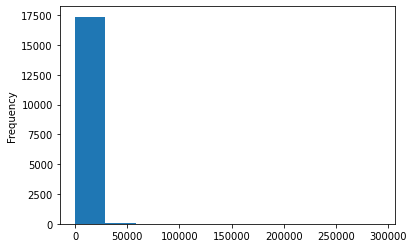

In [ ]:
new_df['comment_lead'].astype(str).map(len).plot.hist()

In [ ]:
new_DF = pd.DataFrame()
new_DF['comment_topic'] = df['Topic Title'] + ' ' + df['Tags'] + ' ' + df['Leading Post'] + ' ' + df['Post Replies']
new_DF['Category'] = df['Category']
new_DF['comment_topic'] = new_DF['comment_topic'].apply(lambda x: str(x))
new_DF['Category'] = new_DF['Category'].apply(lambda x: str(x))

In [ ]:
# changing class names (text) to numbers (a necessity for simpletransformers library)
new_DF['Category'] = new_DF.apply(lambda x:  my_categories.index(x['Category']),axis=1)

In [ ]:
new_DF.head()

,comment_topic,Category
0,About the distributed category (Replace this ...,0
1,Memory leak when using RPC for pipeline parall...,0
2,Distributed Data Parallel example - “process 0...,0
3,How to use 8GPUs as 1 Hi I’m trying to do a l...,0
4,Disabling all reduce in Distributed Data Paral...,0


In [ ]:
new_DF['Category'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

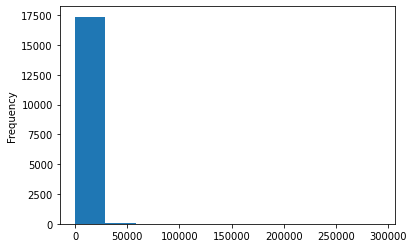

In [ ]:
new_DF['comment_topic'].astype(str).map(len).plot.hist()

In [ ]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(new_df, test_size=0.10)

print('train shape: ',train_df.shape)
print('test shape: ',test_df.shape)

train shape:  (15698, 2)
test shape:  (1745, 2)


In [ ]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
train_DF, test_DF = train_test_split(new_DF, test_size=0.10)

print('train shape: ',train_DF.shape)
print('test shape: ',test_DF.shape)

train shape:  (15698, 2)
test shape:  (1745, 2)


In [ ]:
train_DF

,comment_topic,Category
6554,ConvTranspose3d cuDNN bug non-contiguous input...,3
17978,"Matrices manipulation in pytorch Hi,\nI am tr...",10
17813,Cite resnet 18 for journal I would like to ci...,10
16894,Need to create bounding box only when person i...,10
6060,Same-GPU check in new C++ API In the past whe...,2
...,...,...
12783,CNN: RuntimeError: CUDA error: device-side ass...,10
15751,"Optimizer in PyTorch Hi,\nI have created the ...",10
11127,Metric Learning For Classification - How good ...,10
16974,RuntimeError: sizes must be non-negative Inpu...,10



# **Load pre-trained model**

In [ ]:
pip install -U tokenizers

  Using cached tokenizers-0.10.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.3 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.9.4
    Uninstalling tokenizers-0.9.4:
      Successfully uninstalled tokenizers-0.9.4


In [ ]:
from simpletransformers.classification import ClassificationModel


# **Model_BERT**

In [ ]:
# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 4}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "bert-base-cased",
    num_labels=11,
    args=train_args
)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

# Train_Model_BERT

In [ ]:
# Train the model
model.train_model(train_df)


/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:616: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/15698 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/1963 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/1963 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/1963 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/1963 [00:00<?, ?it/s]

(7852, 0.6302842104985292)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result_Bert, model_outputs, wrong_predictions = model.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1745 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/219 [00:00<?, ?it/s]

In [ ]:
result_Bert

{'acc': 0.7845272206303725,
 'eval_loss': 1.0045801043854898,
 'f1': 0.7845272206303726,
 'mcc': 0.6973676900211052}

### Save and load the model_BERT

save files without outputs/

In [ ]:
import os
import tarfile

def save_model(model_path='',file_name=''):
  files = [files for root, dirs, files in os.walk(model_path)][0]
  with tarfile.open(file_name+ '.tar.gz', 'w:gz') as f:
    for file in files:
      f.add(f'{model_path}/{file}')

In [ ]:
save_model('outputs','pytorchforum-bert-categclass')

In [ ]:
!tar -zxvf ./pytorchforum-bert-categclass.tar.gz

outputs/config.json
outputs/model_args.json
outputs/special_tokens_map.json
outputs/training_args.bin
outputs/vocab.txt
outputs/pytorch_model.bin
outputs/eval_results.txt
outputs/tokenizer_config.json
outputs/tokenizer.json


In [ ]:
!rm -rf outputs

# Test the loaded model_BERT on a real example

In [ ]:
import os
import tarfile

def unpack_model(model_name=''): 
  tar = tarfile.open(f"{model_name}.tar.gz", "r:gz")
  tar.extractall()
  tar.close()

unpack_model('pytorchforum-bert-categclass')

In [ ]:
import re
from bs4 import BeautifulSoup

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\'\“\”\’\|@,;]')

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    return text

In [ ]:
#Testing on Post 1

class_list = ['audio', 'projects', 'complex', 'ignite', 'C++', 'nlp',
       'distributed', 'jit', 'reinforcement-learning', 'Mobile',
       'quantization', 'deployment', 'uncategorized', 'vision',
       'autograd']

post = "I am working on small texts doing Sequence Labelling. Specifically, I use a BERT model from the huggingface library (BertModel in particular), and I tokenize every text with the library’s tokenizer to feed the model. Since the texts are small, I have specified that the sequence length that the tokenizer produces is 256. My labels are binary (1 and 0) and every sequence element (BERT input token) is assigned a label. For the loss computation I use Binary Cross Entropy (BCEWithLogitsLos) but the function considers also the padding tokens to compute the loss which also affects back propagation. I want BCEWithLogitsLos to compute the loss only on the tokens of the text and not also on the padding tokens. Which is the best way to achieve that?"

predictions, raw_outputs = model.predict([clean_text(post)])

print(class_list[predictions[0]])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

distributed


### **Actual Category** - distributed
### **Predicted Category** - distributed

---



In [ ]:
#Testing on Post 2

post = """ 
I use DistributedSampler to sample from the dataset for distributed training. However, I need to gather the distributed tensors to evaluate. How to achieve that?

"""
predictions, raw_outputs = model.predict([clean_text(post)])

print(class_list[predictions[0]])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

audio


### **Actual Category** - uncategorized
### **Predicted Category** - audio


> The model predicts **audio** category whereas actually it is **uncategorised** (picture below for reference) so it streamlines the post more specific.

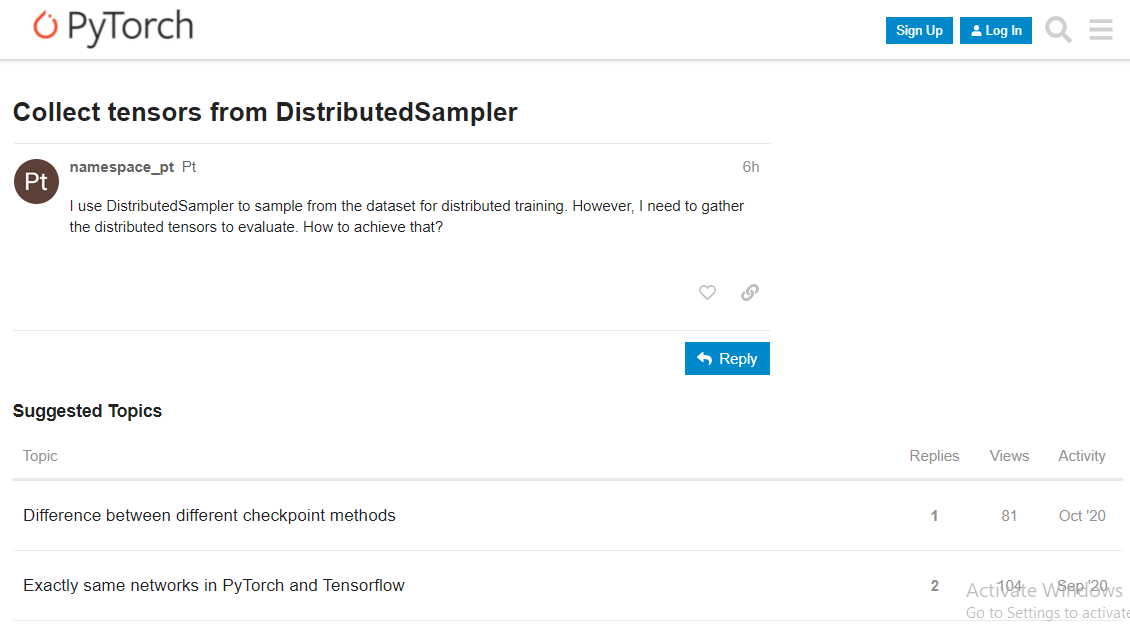

In [ ]:
#Testing on Post 3

post = """ 
Hi all
I am working on adversarial attacks. Some of the attacks I am interested in are written using PyTorch and some are based on TensorFlow. Thus I need to have the trained network in both PyTorch and TensorFlow and they must be exactly similar to have a fair comparison.
How can I have a PyTorch network in TensorFlow while I can do differentiating to generate adversary.
Thanks for your help in advance
"""
predictions, raw_outputs = model.predict([clean_text(post)])

print(class_list[predictions[0]])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

quantization


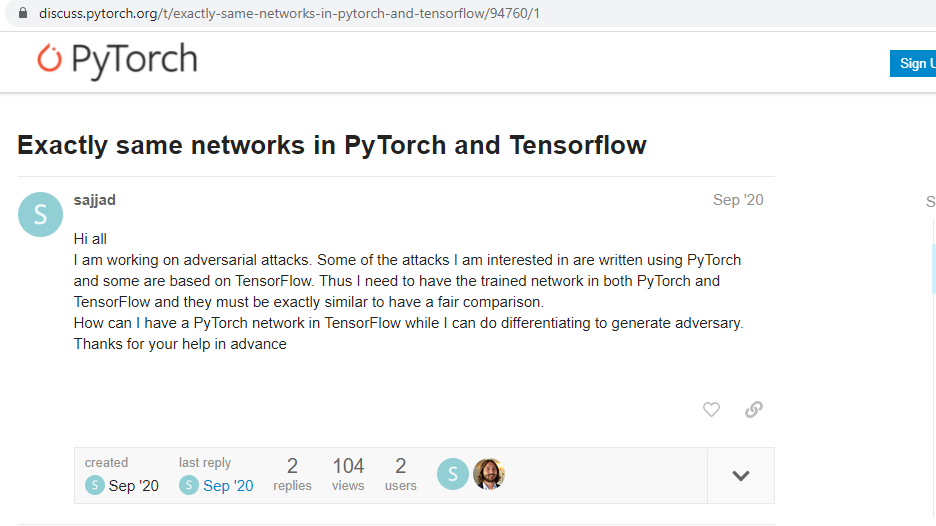

### **Actual Category** - uncategorized
### **Predicted Category** - quantization

> **This model is doing pretty good as it is not only able to predict based on already categorised data but it also predicts the most related category for the uncategorised data.**





# **RoBERTa**

In [ ]:
from simpletransformers.classification import ClassificationModel

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 4}

# Create a ClassificationModel
model_rob = ClassificationModel(
    'roberta', 'roberta-base',
    num_labels=11,
    args=train_args
)

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_p

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

#Train model_Roberta

In [ ]:
# Train the model
model_rob.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:616: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/15698 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/1963 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/1963 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/1963 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/1963 [00:00<?, ?it/s]

(7852, 0.6935006950369178)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result_Roberta, model_outputs, wrong_predictions = model_rob.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1745 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/219 [00:00<?, ?it/s]

In [ ]:
result_Roberta

{'acc': 0.7873925501432665,
 'eval_loss': 0.8558361802343705,
 'f1': 0.7873925501432665,
 'mcc': 0.70069456217513}

# Save and load the model_Roberta

In [ ]:
import os
import tarfile

def save_model(model_path='',file_name=''):
  files = [files for root, dirs, files in os.walk(model_path)][0]
  with tarfile.open(file_name+ '.tar.gz', 'w:gz') as f:
    for file in files:
      f.add(f'{model_path}/{file}')

In [ ]:
save_model('outputs','pytorchforum-roberta-categclass')

In [ ]:
!tar -zxvf ./pytorchforum-roberta-categclass.tar.gz

outputs/config.json
outputs/model_args.json
outputs/special_tokens_map.json
outputs/training_args.bin
outputs/vocab.txt
outputs/vocab.json
outputs/merges.txt
outputs/pytorch_model.bin
outputs/eval_results.txt
outputs/tokenizer_config.json
outputs/tokenizer.json


In [ ]:
!rm -rf outputs

# Test the loaded model_Roberta on a real example

In [ ]:
import os
import tarfile

def unpack_model(model_name=''): 
  tar = tarfile.open(f"{model_name}.tar.gz", "r:gz")
  tar.extractall()
  tar.close()

unpack_model('pytorchforum-roberta-categclass')

In [ ]:
import re
from bs4 import BeautifulSoup

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\'\“\”\’\|@,;]')

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    return text

In [ ]:
#Testing on Post 4

class_list = ['audio', 'projects', 'complex', 'ignite', 'C++', 'nlp',
       'distributed', 'jit', 'reinforcement-learning', 'Mobile',
       'quantization', 'deployment', 'uncategorized', 'vision',
       'autograd']

post = """ 

Even if I set it to run on GPU 1 from main() to setdevice(), if I create a thread and have the cuda function run inside the thread, it will reset back to GPU 0.
What’s wrong?
Do I always have to initialize GPU index to 1 every time I create a thread?

"""

predictions, raw_outputs = model.predict([clean_text(post)])

print(class_list[predictions[0]])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

complex


##### **Actual Category** - complex
##### **Predicted Category** - complex

---






In [ ]:
#Testing on Post 5

post = """ 

I’m having a hard time adapting my code to work across a batch example. Previously I had

idx.shape == torch.Size([50, 4])
points.shape == torch.Size([400, 3])
# Index
points[idx].shape == torch.Size([50, 4, 3])
So I would sample four, 3D points, from a set of 400 points and have this repeated 50 times. This was just for one observation. Now I would like to run this for each observation in a batch of 256, thus:

idx.shape == torch.Size([256, 50, 4])
points.shape == torch.Size([256, 400, 3])

# Doesn't work:
points[idc].shape
# Doesn't work:
torch.gather(points, 1, idx).shape

# Works but I want to avoid the loop
torch.stack([points[i][idx[i]] for i in range(len(points))]).shape == torch.Size([256

"""

predictions, raw_outputs = model.predict([clean_text(post)])

print(class_list[predictions[0]])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

quantization


##### **Actual Category** - uncategorized
##### **Predicted Category** - quantization

---


In [ ]:
#Testing on Post 6

post = """ 

’m trying to send my CNN model to the GPU device, but each time I run model = model.to(device) I got an error “RuntimeError: CUDA error: out of memory”.

I tried to use

import torch
torch.cuda.empty_cache()
but that did not work, I’ve restarted the Kernal but that didn’t solve the problem. I checked the free/used memory, it looks full, I’ve tried to clean the memory using torch.cuda.empty_cache() that did not work, the below image shows the free/used memory.

I don’t have any idea why this error pops-up even I don’t send or train any model on the GPU.

"""

predictions, raw_outputs = model.predict([clean_text(post)])

print(class_list[predictions[0]])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

quantization


##### **Actual Category** - uncategorized
##### **Predicted Category** - quantization

---


# **DistilBERT**

In [ ]:
from simpletransformers.classification import ClassificationModel

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 4}

# Create a ClassificationModel
model_distil = ClassificationModel(
    'distilbert', 'distilbert-base-cased',
    num_labels=11,
    args=train_args
)

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'pre_classifier.w

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

# Train model_DistilBert

In [ ]:
# Train the model
model_rob.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:616: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/15698 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/1963 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/1963 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/1963 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/1963 [00:00<?, ?it/s]

(7852, 0.4271143678264641)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result_distilbert, model_outputs, wrong_predictions = model_distil.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1745 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/219 [00:00<?, ?it/s]

In [ ]:
result_distilbert

{'acc': 0.05902578796561605,
 'eval_loss': 2.4248839284731374,
 'f1': 0.05902578796561605,
 'mcc': 0.01652505598719042}

# Save and load the model_distilBert

In [ ]:
import os
import tarfile

def save_model(model_path='',file_name=''):
  files = [files for root, dirs, files in os.walk(model_path)][0]
  with tarfile.open(file_name+ '.tar.gz', 'w:gz') as f:
    for file in files:
      f.add(f'{model_path}/{file}')

In [ ]:
save_model('outputs','pytorchforum-distilbert-categclass')

In [ ]:
!tar -zxvf ./pytorchforum-distilbert-categclass.tar.gz

outputs/config.json
outputs/model_args.json
outputs/special_tokens_map.json
outputs/training_args.bin
outputs/vocab.txt
outputs/vocab.json
outputs/merges.txt
outputs/pytorch_model.bin
outputs/eval_results.txt
outputs/tokenizer_config.json
outputs/tokenizer.json


In [ ]:
!rm -rf outputs

# Test the loaded model_distilBert on a real example

In [ ]:
import os
import tarfile

def unpack_model(model_name=''): 
  tar = tarfile.open(f"{model_name}.tar.gz", "r:gz")
  tar.extractall()
  tar.close()

unpack_model('pytorchforum-distilbert-categclass')

In [ ]:
import re
from bs4 import BeautifulSoup

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\'\“\”\’\|@,;]')

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    return text

In [ ]:
#Testing on Post 7

class_list = ['audio', 'projects', 'complex', 'ignite', 'C++', 'nlp',
       'distributed', 'jit', 'reinforcement-learning', 'Mobile',
       'quantization', 'deployment', 'uncategorized', 'vision',
       'autograd']

post = """ 

I have a matrix of features feat = [n_shot, n_way, n_dim] and a weight matrix weight = [n_shot, n_way]. I want to take the top-k features from the first dimension, according to the weight matrix. Since top-k doesn’t support this natively, I’ve implemented it in the following way:

topk, ind = torch.topk(sim, k, dim=0)
feat_topk = Variable(torch.zeros(k, n_way, n_dim))
for way in range(n_way):
   for shot in range(k):
     feat_topk[shot][way] = feat[ind[shot][way]][way]
This works, but obviously the in-place assignment means that feat_topk has no gradient information, which I would definitely like to have as feat_topk is then used to directly compute the loss. I know torch.topk is backprop-able, but I’m not sure how to make a version of this that is. I would appreciate any help on this, thank you!

"""

predictions, raw_outputs = model.predict([clean_text(post)])

print(class_list[predictions[0]])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

quantization


In [ ]:
#Testing on Post 8

post = """ 

Hello everyone,
I am new to PyTorch, so please excuse me if my problem is trivial :). At the moment I am trying to rewrite a code implementing the reinforcement learning algorithm Soft Actor Critic (SAC) together with an LSTM-layer shared by all the neural nets involved. My version of the code is exactly the same as the original one, apart from the fact that I created an nn.Module class for every type of neural network (e.g. SoftQNetwork, ValueNetwork, PolicyNetwork). The original code uses Sequential.
As optimizer I am using a single Adam optimizer for the parameters of all networks. The problem is that the original code works well (I am currently training pendulum) whereas my code does not seem to work.
Does anyone have an idea what I might be doing wrong?
Thank you in advance!

"""

predictions, raw_outputs = model.predict([clean_text(post)])

print(class_list[predictions[0]])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

reinforcement-learning


In [ ]:
#Testing on Post 9

post = """ 

Hi,
does the C++ API have a function which is equivalent to the torch.autograd.functional.jacobian function from Pytorch? If there is, I cannot find it.
Best,
Simon

"""

predictions, raw_outputs = model.predict([clean_text(post)])

print(class_list[predictions[0]])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

complex


# **XLNet**

In [ ]:
from simpletransformers.classification import ClassificationModel

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 4}


# Create a ClassificationModel
model_xlnet = ClassificationModel(
    'xlnet', 'xlnet-base-cased',
    num_labels=11,
    args=train_args
)

Downloading:   0%|          | 0.00/760 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.weight', 'sequence_summary.summary.weight', 'logits_proj.bias', 'sequence_summary.summary.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

# Train model_Xlnet

In [ ]:
# Train the model
model_xlnet.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:616: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/15698 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/1963 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/1963 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/1963 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/1963 [00:00<?, ?it/s]

(7852, 0.6480912023415313)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result_xlnet, model_outputs, wrong_predictions = model_xlnet.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1745 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/219 [00:00<?, ?it/s]

In [ ]:
result_xlnet

{'acc': 0.8005730659025788,
 'eval_loss': 0.9633208000958051,
 'f1': 0.8005730659025788,
 'mcc': 0.7197443591288993}

# Save and load the model_Xlnet

In [ ]:
import os
import tarfile

def save_model(model_path='',file_name=''):
  files = [files for root, dirs, files in os.walk(model_path)][0]
  with tarfile.open(file_name+ '.tar.gz', 'w:gz') as f:
    for file in files:
      f.add(f'{model_path}/{file}')

In [ ]:
save_model('outputs','pytorchforum-xlnet-categclass')

In [ ]:
!tar -zxvf ./pytorchforum-distilbert-categclass.tar.gz

outputs/config.json
outputs/model_args.json
outputs/special_tokens_map.json
outputs/training_args.bin
outputs/vocab.txt
outputs/vocab.json
outputs/merges.txt
outputs/pytorch_model.bin
outputs/eval_results.txt
outputs/tokenizer_config.json
outputs/tokenizer.json


In [ ]:
!rm -rf outputs

# Test the loaded model_Xlnet on a real example

In [ ]:
import os
import tarfile

def unpack_model(model_name=''): 
  tar = tarfile.open(f"{model_name}.tar.gz", "r:gz")
  tar.extractall()
  tar.close()

unpack_model('pytorchforum-xlnet-categclass')

In [ ]:
import re
from bs4 import BeautifulSoup

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\'\“\”\’\|@,;]')

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    return text

In [ ]:
#Testing on Post 10

class_list = ['audio', 'projects', 'complex', 'ignite', 'C++', 'nlp',
       'distributed', 'jit', 'reinforcement-learning', 'Mobile',
       'quantization', 'deployment', 'uncategorized', 'vision',
       'autograd']

post = """ 

I had a question. In general, what’s the best way to test if autograd works with certain external packages? That is, the gradient is being properly calculated…

In my case I am coding a GAN - the generator outputs some values but before I pass them into the discriminator, I have to perform some transformations (this is odometry data). Those transformations involve this package, mathutils. Here’s an example of a function I apply to the output of the generator (Note that R and T and rotation and translation values that determine a 6dof pose)


def to_rotation_matrix(R, T):
    if isinstance(R, torch.Tensor):
        R = quat2mat(R)
        T = tvector2mat(T)
        RT = torch.mm(T, R)
    else:
        R = R.to_matrix()
        R.resize_4x4()
        T = mathutils.Matrix.Translation(T)
        RT = T@R
    return RT
I want to ensure that using these sorts of custome functions isn’t going to mess with the autograd and that all the gradients will be taken correctly. I’m trying to find the best way to test whether or not autograd is correctly calculating the gradients, i.e., that it’s account for the transformations and rotations that I am doing. Is there a good way/simple way to test this? Thanks

"""

predictions, raw_outputs = model.predict([clean_text(post)])

print(class_list[predictions[0]])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

projects


##### **Actual Category** - Uncategorized
##### **Predicted Category** - projects

---


In [ ]:
#Testing on Post 11

post = """ 

Hi,

I’m new to PyTorch and having some issues loading continuous/numerical data properly using a dataloader, while also mean-centering and scaling the data to unit variance.

I’m following a similar code format to what I’ve used for image data previously (e.g., CNN for MNIST), but definitely having issues with properly setting/implementing my custom transform function to this continuous/numerical data. I’d appreciate anyone’s input on this matter!

My dataset currently has 60 samples and 46 features (independent variables) that will be used to predict 1 continuous target variable (for now, could also be multiple target variables down the line) using a feed-forward/ANN type model. Future datasets could also have thousands of samples…

My code is as follows below, but I keep getting errors associated with multiple input types (ndarray vs. tensor), unsupported operand type(s), etc. depending on what I attempt.

I think really all I need is for my custom transform function to properly mean-center and scale the data (as well as transform to tensor of course) and I’d like to print out a couple test batches of my training and validation data so that I can make sure it’s working properly before I build the ANN model class. I should also mention that the code seems to be working just fine in terms of the train/validation splits, etc. → it ultimately breaks down when trying to pass the transform function.

"""

predictions, raw_outputs = model.predict([clean_text(post)])

print(class_list[predictions[0]])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

quantization


##### **Actual Category** - Ucategorized
##### **Predicted Category** - quantization

---


In [ ]:
#Testing on Post 12

post = """ 

Let’s say I have 8 models hosted on 8 GPUs (same class, different initialization)

models = [MyModule().cuda(i) for i in range(8)]
And I have a CPU tensor

x = torch.randn(1000, 128)
If I run the forward pass for all 8 models in a for loop like this

predictions = [models[i](x.cuda(i, non_blocking=True)) for i in range(8)]
The run time is significantly slower, probably 6x~7x than just running it on one single GPU

models[0](x.cuda(0, non_blocking=True))
Is this expected? I was under the impression that CUDA operations are asynchronous, and it should remain non-blocking unless the result of the forward pass is used by someone else?

"""

predictions, raw_outputs = model.predict([clean_text(post)])

print(class_list[predictions[0]])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

quantization


##### **Actual Category** - uncategorized
##### **Predicted Category** - quantization

---


# Performance Results


In [ ]:
import pandas as pd
result=pd.DataFrame({'Model_Name': ['BERT', 'roberta', 'distilbert','xlnet'],
                     'Accuracy':[result_Bert['acc'],result_Roberta['acc'],result_distilbert['acc'],result_xlnet['acc']],
                     'Evaluation_loss':[result_Bert['eval_loss'],result_Roberta['eval_loss'],result_distilbert['eval_loss'],result_xlnet['eval_loss']],
                      'F1_Score':[result_Bert['f1'],result_Roberta['f1'],result_distilbert['f1'],result_xlnet['f1']],
                      'MCC':[result_Bert['mcc'],result_Roberta['mcc'],result_distilbert['mcc'],result_xlnet['mcc']]})

In [ ]:
result

,Model_Name,Accuracy,Evaluation_loss,F1_Score,MCC
0,BERT,0.784527,1.004580,0.784527,0.697368
1,roberta,0.787393,0.855836,0.787393,0.700695
2,distilbert,0.059026,2.424884,0.059026,0.016525
3,xlnet,0.800573,0.963321,0.800573,0.719744


#### Highest Accuracy - XLNet : 80.05%